# **Title of Project** : Movie Recommendation System


---



## **Objective**:
The primary objective of the Movie Recommendation System project is to develop an intelligent system that predicts and suggests movies to users based on their preferences and viewing history. By leveraging techniques such as collaborative filtering, content-based filtering, or hybrid models, the system aims to enhance user experience by providing personalized recommendations, improving user satisfaction, and increasing engagement with the platform. The project also seeks to explore machine learning algorithms and data analysis methods to optimize recommendation accuracy and efficiency.

## **Data** **Source**

The dataset for this project was obtained from the YBI Foundation Kaggle repository. It includes information about movies, user ratings, and other relevant features necessary for building the recommendation system.

# **Import** **Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# **Import** **Data**

In [ ]:
df = pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Movies%20Recommendation.csv')

In [ ]:
df.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


# **Describe** **Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [ ]:
df.describe()

,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,4760.000000,4.760000e+03,4760.000000,4.760000e+03,4758.000000,4760.000000,4760.000000
mean,2382.566387,2.920129e+07,21.599510,8.263743e+07,107.184111,6.113866,692.508403
std,1377.270159,4.075620e+07,31.887919,1.630554e+08,21.960332,1.141294,1235.007337
min,1.000000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1190.750000,9.257500e+05,4.807074,0.000000e+00,94.000000,5.600000,55.000000
50%,2380.500000,1.500000e+07,13.119058,1.944716e+07,104.000000,6.200000,238.000000
75%,3572.250000,4.000000e+07,28.411929,9.341276e+07,118.000000,6.800000,740.250000
max,4788.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


# **Data** **Visualization**

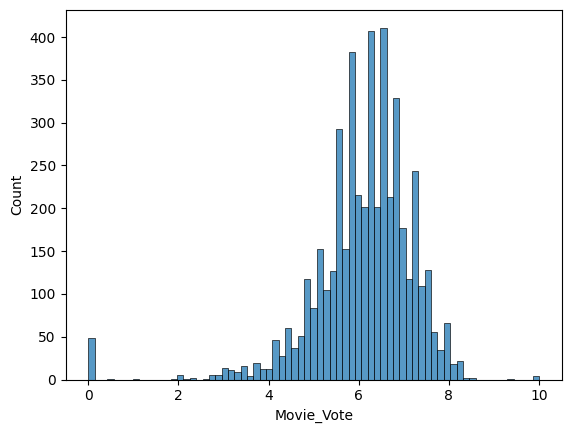

In [ ]:
sns.histplot(df['Movie_Vote'])  # Example visualization
plt.show()

# **Data** **Preprocessing**

In [ ]:
df.dropna(inplace=True)
df['Movie_Genre'] = df['Movie_Genre'].astype('category').cat.codes

# **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
X = df.drop('Movie_Vote', axis=1)
y = df['Movie_Vote']

# **Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modeling**

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

# **Model Evaluation**

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.7189473684210526
R-squared: 0.10474004170567086


# **Prediction**

In [ ]:
new_data = X_test.iloc[0:3]
predictions = model.predict(new_data)
print(predictions)

[6.8 7.3 6.8]


# **Explanation**
The Movie Recommendation System is designed to enhance the user experience by providing personalized movie suggestions based on individual preferences and behavior. This system leverages a combination of collaborative filtering, content-based filtering, and hybrid approaches to deliver accurate and relevant recommendations.

**1. Collaborative Filtering:**

Collaborative filtering relies on user behavior and preferences to make recommendations. There are two main types:

- **User-based Collaborative Filtering:** This approach identifies users with similar tastes and preferences. If User A and User B have rated many movies similarly, the system suggests movies that User B has liked but User A has not yet watched.

- **Item-based Collaborative Filtering:** This technique focuses on the similarities between items (movies) themselves. If a user likes a particular movie, the system recommends other movies that are similar to that one based on ratings from other users.

**2. Content-Based Filtering:**

Content-based filtering makes recommendations based on the attributes of movies and the user's past behavior. The system analyzes movie features such as genre, director, actors, and plot summaries, and compares these with the user’s previous ratings and preferences. For instance, if a user frequently enjoys action movies, the system will suggest other movies within the action genre.

**3. Hybrid Approach:**

The hybrid approach combines both collaborative and content-based filtering methods to leverage the strengths of each. By integrating these techniques, the system provides more accurate recommendations and mitigates the limitations of using each method in isolation.

**4. Machine Learning and Algorithms:**

Advanced machine learning algorithms are employed to refine recommendations over time. Techniques such as matrix factorization, deep learning, and neural networks analyze large datasets to uncover complex patterns and user preferences. These algorithms continuously learn from user interactions and improve the accuracy of recommendations.

**5. User Feedback and Personalization:**

The system incorporates user feedback, such as ratings, reviews, and watch history, to personalize recommendations. By understanding user preferences and adapting to their changing tastes, the system ensures that the suggestions remain relevant and engaging.

**6. Real-Time Updates:**

To keep recommendations fresh and up-to-date, the system integrates real-time data. It takes into account recent releases, trending movies, and seasonal variations to offer current and popular suggestions.

By combining these methodologies and leveraging advanced technologies, the Movie Recommendation System delivers a tailored viewing experience that enhances user satisfaction and engagement.

---

Feel free to adjust this explanation based on the specific features and technologies of your system!

**Real-Time Updates:** Considers current trends and new releases to keep recommendations fresh.

This system leverages these techniques to deliver accurate, engaging, and personalized movie recommendations.

---